# Canvas Exploration For Automated Mandala Creation 

In [48]:
# Import modules
import numpy as np
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
# Run notebook mode for Jupyter offline plotting
init_notebook_mode(connected=True)

# Set theta = [0, 2PI] in N bins
N = 1000 # Number of bins
theta = np.arange(N+1)*2*np.pi/N

1. Investigate when does a curve closes back and when not.
2. Add the multilevel code to plot only parts bigger or equal than a certain radius threshold.
3. Perform a random choosing of (a_n, w_n) for sine and (a_n', w_n') cosine parts of the Fourier series.
4. Plot each Fourier series constructed by following the instructions on step 3 to construct the mandala.

## Create Fourier Series

The following function creates a fouries series according to the number of sines, cosines given and if it includes a contanst for the values in theta.

The returning array has the same number of elements as *theta*. They correspond to the values of *r* for each *theta*

In [49]:
def fourier_series(theta, num_sines=0, num_cosines=0, a0=False):
    # The max and min of amplitudes and frequencies could be made explicit in the function call
    a_sines = np.random.randint(15+1, size=num_sines) # Max amplitude is 2
    n_sines = np.random.randint(10+1, size=num_sines) # Max term on the fourier series is the 100th
    a_cosines = np.random.randint(15+1, size=num_cosines) # Max amplitude is 2
    n_cosines = np.random.randint(10+1, size=num_cosines) # Max term on the fourier series is the 100th
    if a0 == True:
        a0 = np.random.randint(0, 10+1, 1)[0]
    # Construct the Fourier series
    f = np.full_like(theta, a0)
    for i in np.arange(num_sines): # Add the sines
        f_sin_n = a_sines[i]*np.sin(n_sines[i]*theta)
        f = np.add(f, f_sin_n)
    for i in np.arange(num_cosines): # Add the cosines
        f_cos_n = a_cosines[i]*np.cos(n_cosines[i]*theta)
        f = np.add(f, f_cos_n)
    return f

The following function sends all values outside than a certain range of radius to zero. This is in order to select only a part of the figure of the fourier function.

In [50]:
def in_range(r_i, r_f, f):
    output = []
    for val in f:
        if (val < r_i):
            output.append(r_i)
        elif (val > r_f):
            output.append(r_f)
        else:
            output.append(val)
    return output

In [80]:
def scale_to_radial_section(r_i, r_f, f):
    average_r = (r_i + r_f) / 2
    random_scale_factor = np.random.randint(1, 2, 1)[0]
    max_f = max(f)
    print("-----------------------")
    print("average_r: {0}".format(average_r))
    print("random_scale_factor: {0}".format(random_scale_factor))
    print("max_f: {0}".format(max_f))
    re_scaled_f = (average_r*random_scale_factor) * (f/max_f)
    print("re_scaled_f - min: {0} - max: {1}".format(min(re_scaled_f), max(re_scaled_f)))
    print("-----------------------")
    return re_scaled_f

In [52]:
np.arange(3)
np.random.randint(1, 10, 1)[0]

2

In [53]:
def plot_mandala():
    data = [] # Plot data variable. It contain the trace objects

    # Create and append to data array the trace objects
    for i in np.arange(4):
        # Make fourier series
        r = fourier_series(theta, 1, 1, True)
        t = theta*360/(2*np.pi)
        # Scale r to range in radial section.
        r = scale_to_radial_section(i*10, (i+1)*10, r)
        # Select range of values in radial section. The radiuses ranges are always 2 units wide
        r = in_range(i*10, (i+1)*10, r)
        # Make trace
        trace = go.Scatter(
            r=r,
            t=t,
            mode='lines',
            name='Trace',
            marker=dict(
                color='none',
                line=dict(
                    color='green'
                )
            )
        )
        data.append(trace)

    # Set layout for figure
    layout = go.Layout(
        title='Mandala Exploration',
        font=dict(
            family='Arial, sans-serif;',
            size=12,
            color='#000'
        ),
        orientation=0,
        autosize=True,

    )

    # Do actual plotting
    #return iplot({"data": data, "layout": layout}, image="png", filename="first-mandala.png")
    return iplot({"data": data, "layout": layout})

In [90]:
plot_mandala()

-----------------------
average_r: 5.0
random_scale_factor: 1
max_f: 14.0
re_scaled_f - min: -3.5714285714285716 - max: 5.0
-----------------------
-----------------------
average_r: 15.0
random_scale_factor: 1
max_f: 20.2219173466511
re_scaled_f - min: -7.582305751297065 - max: 15.0
-----------------------
-----------------------
average_r: 25.0
random_scale_factor: 1
max_f: 22.752314678161706
re_scaled_f - min: -3.2963679107333657 - max: 25.0
-----------------------
-----------------------
average_r: 35.0
random_scale_factor: 1
max_f: 9.878375860723954
re_scaled_f - min: 0.4309255827758769 - max: 35.0
-----------------------


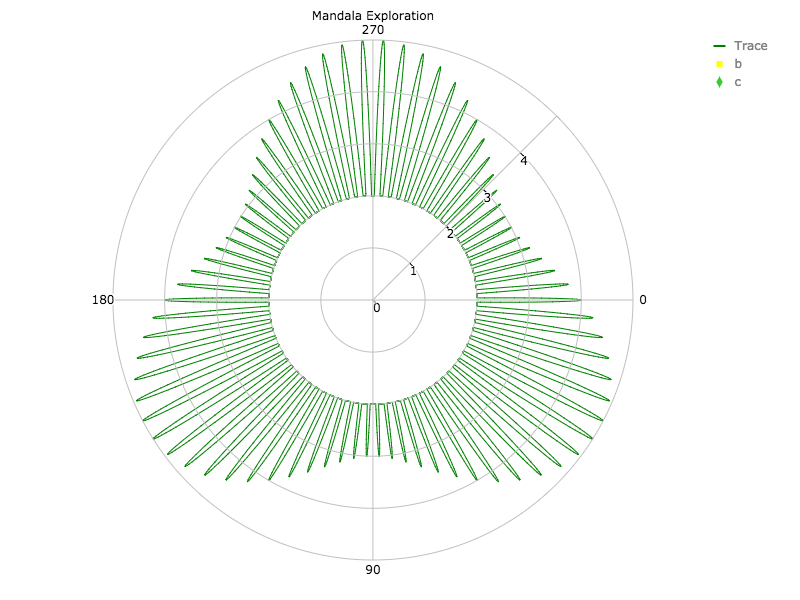

In [55]:
from IPython.display import Image
Image("mandala-canvas.png")

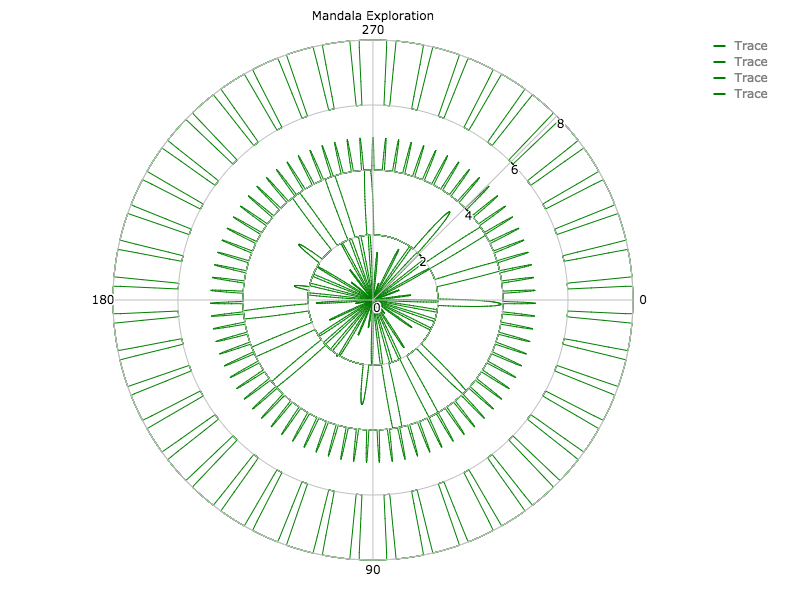

In [56]:
from IPython.display import Image
Image("first-mandala.png")

Two points need to be explored in order to answer the question as to whether it is possible to achieve a higher variability in mandala figures.

1. The exploration of individual mandala creation. Setting an appropriate scale for all parameters such that any variation of parameters would arise in a set of mandalas that could also be created under the current constraint, modulo a scale factor.

2. Once the point number 1 is explored proceed to select proper scaling factors according to the radius range. A very narrow set of scale factors should produce a narrow variability.

By modifying this 2 aspects regarding particular mandala creation and range selecting factor the variability of the figures should increase. 